
-----

# **`US Visa Prediction Project`**

#### **Life cycle of Machine Learning Project**

- Understanding the Problem Statement
-  Data Collection
-  Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### **About Dataset**

The **Immigration and Nationality Act (INA)** of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

Further explanation of Data Features:

| Column Name              | Description                                                                                                                                                                                                                                                                                                                |
|--------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **case_id**              | ID of each visa application.                                                                                                                                                                                                                                                                                              |
| **continent**            | Continent information of the employee's origin.                                                                                                                                                                                                                                                                           |
| **education_of_employee**| Education background of the employee.                                                                                                                                                                                                                                                                                     |
| **has_job_experience**   | Indicates if the employee has prior job experience (Y = Yes; N = No).                                                                                                                                                                                                                                                     |
| **requires_job_training**| Indicates if the employee requires job training (Y = Yes; N = No).                                                                                                                                                                                                                                                        |
| **no_of_employees**      | Total number of employees in the employer's company.                                                                                                                                                                                                                                                                      |
| **yr_of_estab**          | The year in which the employer's company was established.                                                                                                                                                                                                                                                                |
| **region_of_employment** | Intended region within the U.S. where the foreign worker plans to work.                                                                                                                                                                                                                                                   |
| **prevailing_wage**      | Average wage paid to workers in a similar occupation within the area of intended employment. Ensures fair compensation relative to other workers in the same area and role.                                                                                                                                            |
| **unit_of_wage**         | Unit of measure for the prevailing wage (e.g., Hourly, Weekly, Monthly, Yearly).                                                                                                                                                                                                                                         |
| **full_time_position**   | Indicates if the position is full-time (Y = Full-Time Position; N = Part-Time Position).                                                                                                                                                                                                                                 |
| **case_status**          | Final status of the visa application (certified or denied).     |


### **1) Problem statement**

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.

- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

- This model is to check if Visa get approved or not based on the given dataset.

- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

### **2) Data Collection**

- The Dataset is part of Office of Foreign Labor Certification (OFLC).
- The data consists of 25480 Rows and 12 Columns.

You can get this data from here:

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

-----



### **Import Required Packages**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore")

### **Import Data**

- Load data as pandas dataframe.

In [2]:
df = pd.read_csv(r"E:\MLOPs-US-Visa-Approval-Prediction-Project\notebooks\dataset\EasyVisa.csv")

#### **First 5 Rows of Dataset**

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### **Shape of the dataset**

In [4]:
print(f"This Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

This Dataset has 25480 rows and 12 columns.


### **Detailed Information of Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### **Check Missing Values from Data**

In [6]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- We can see no missing Values in this dataset.

### **Summary of the dataset**

In [7]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


## **Exploring Data**

### **Check Numerical Columns**

In [8]:
# Identify columns in the DataFrame 'df' that have numerical data types
# 'numeric_features' will store the list of all columns where the data type is not 'O' (object/string)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Print the count and names of numerical features in the DataFrame
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))


We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### **Check Catagorical Columns**

In [9]:
# Create a list of categorical features by checking each column in the DataFrame 'df'
# A categorical feature is defined as a column with data type 'O' (object), typically used for strings
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the number of categorical features and the list of those features
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))



We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


### **Let's Check Propotion of Catagorical Features Values**

In [10]:
# Create a list of categorical features by checking each column in the DataFrame 'df'
# Exclude the 'case_id' column from the list of categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature != 'case_id']

# Proportion of count data on categorical columns
for col in categorical_features:
    # Print the normalized value counts (as a percentage) for each categorical column
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
---------------------------
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64
---------------------------
full_time_posi

#### **Insights**

- `case_id` have unique vlaues for each column which can be dropped as it it of no importance

- `continent` column is highly biased towards asia. hence we can combine other categories to form a single category.

- `unit_of_wage` seems to be an important column as most of them are yearly contracts.


### **Univariate Analysis**

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are

- **Bivariate Analysis**: The analysis of two variables.
- **Multivariate Analysis**: The analysis of two or more variables.
 

### **Univariate Analysis of Numerical Features**

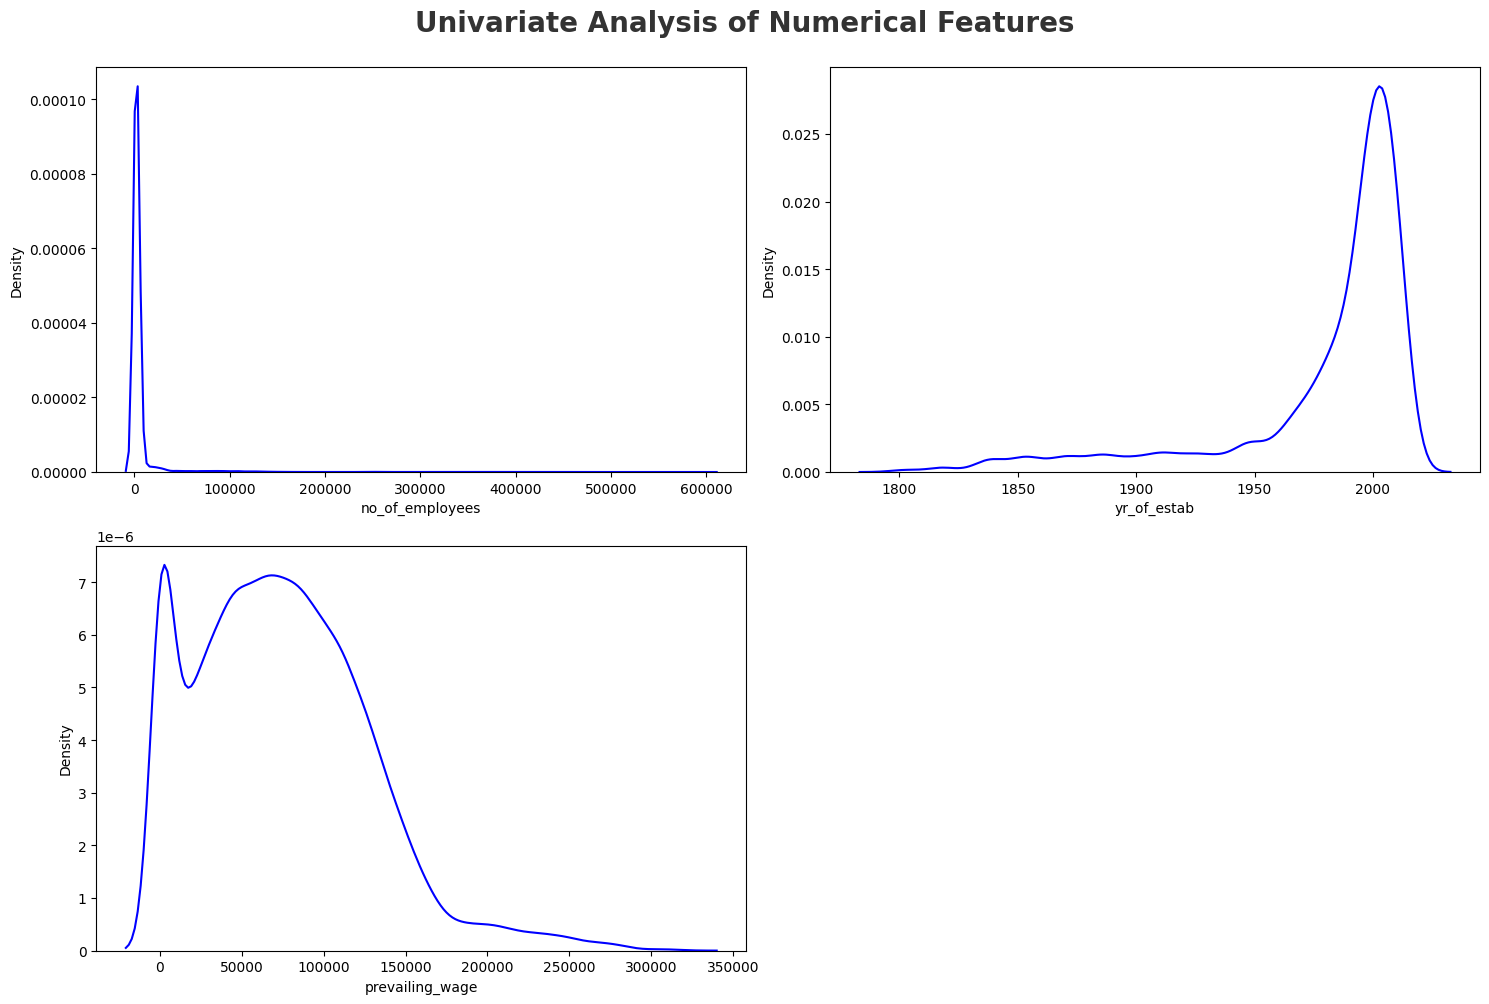

In [11]:
# Set the figure size for the plot
plt.figure(figsize=(15, 10))

# Set the main title for the entire figure with specified font size, weight, transparency, and position
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through each numerical feature to create a subplot for its distribution
for i in range(0, len(numeric_features)):
    # Create a subplot in a 2x2 grid, positioning the current plot in the correct location
    plt.subplot(2, 2, i + 1)

    # Generate a Kernel Density Estimate (KDE) plot for the current numerical feature
    sns.kdeplot(x=df[numeric_features[i]], color='blue')

    # Set the x-axis label to the name of the current numerical feature
    plt.xlabel(numeric_features[i])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()



#### **Insights**

- `no_of_employees` column looks more skewed but it may be because of outliers.

- `yr_of_estab` is a discrete feature.

- `privailing-wage` is a right-skewed distribution.

### **Univariate Analysis of Catagorical Features**

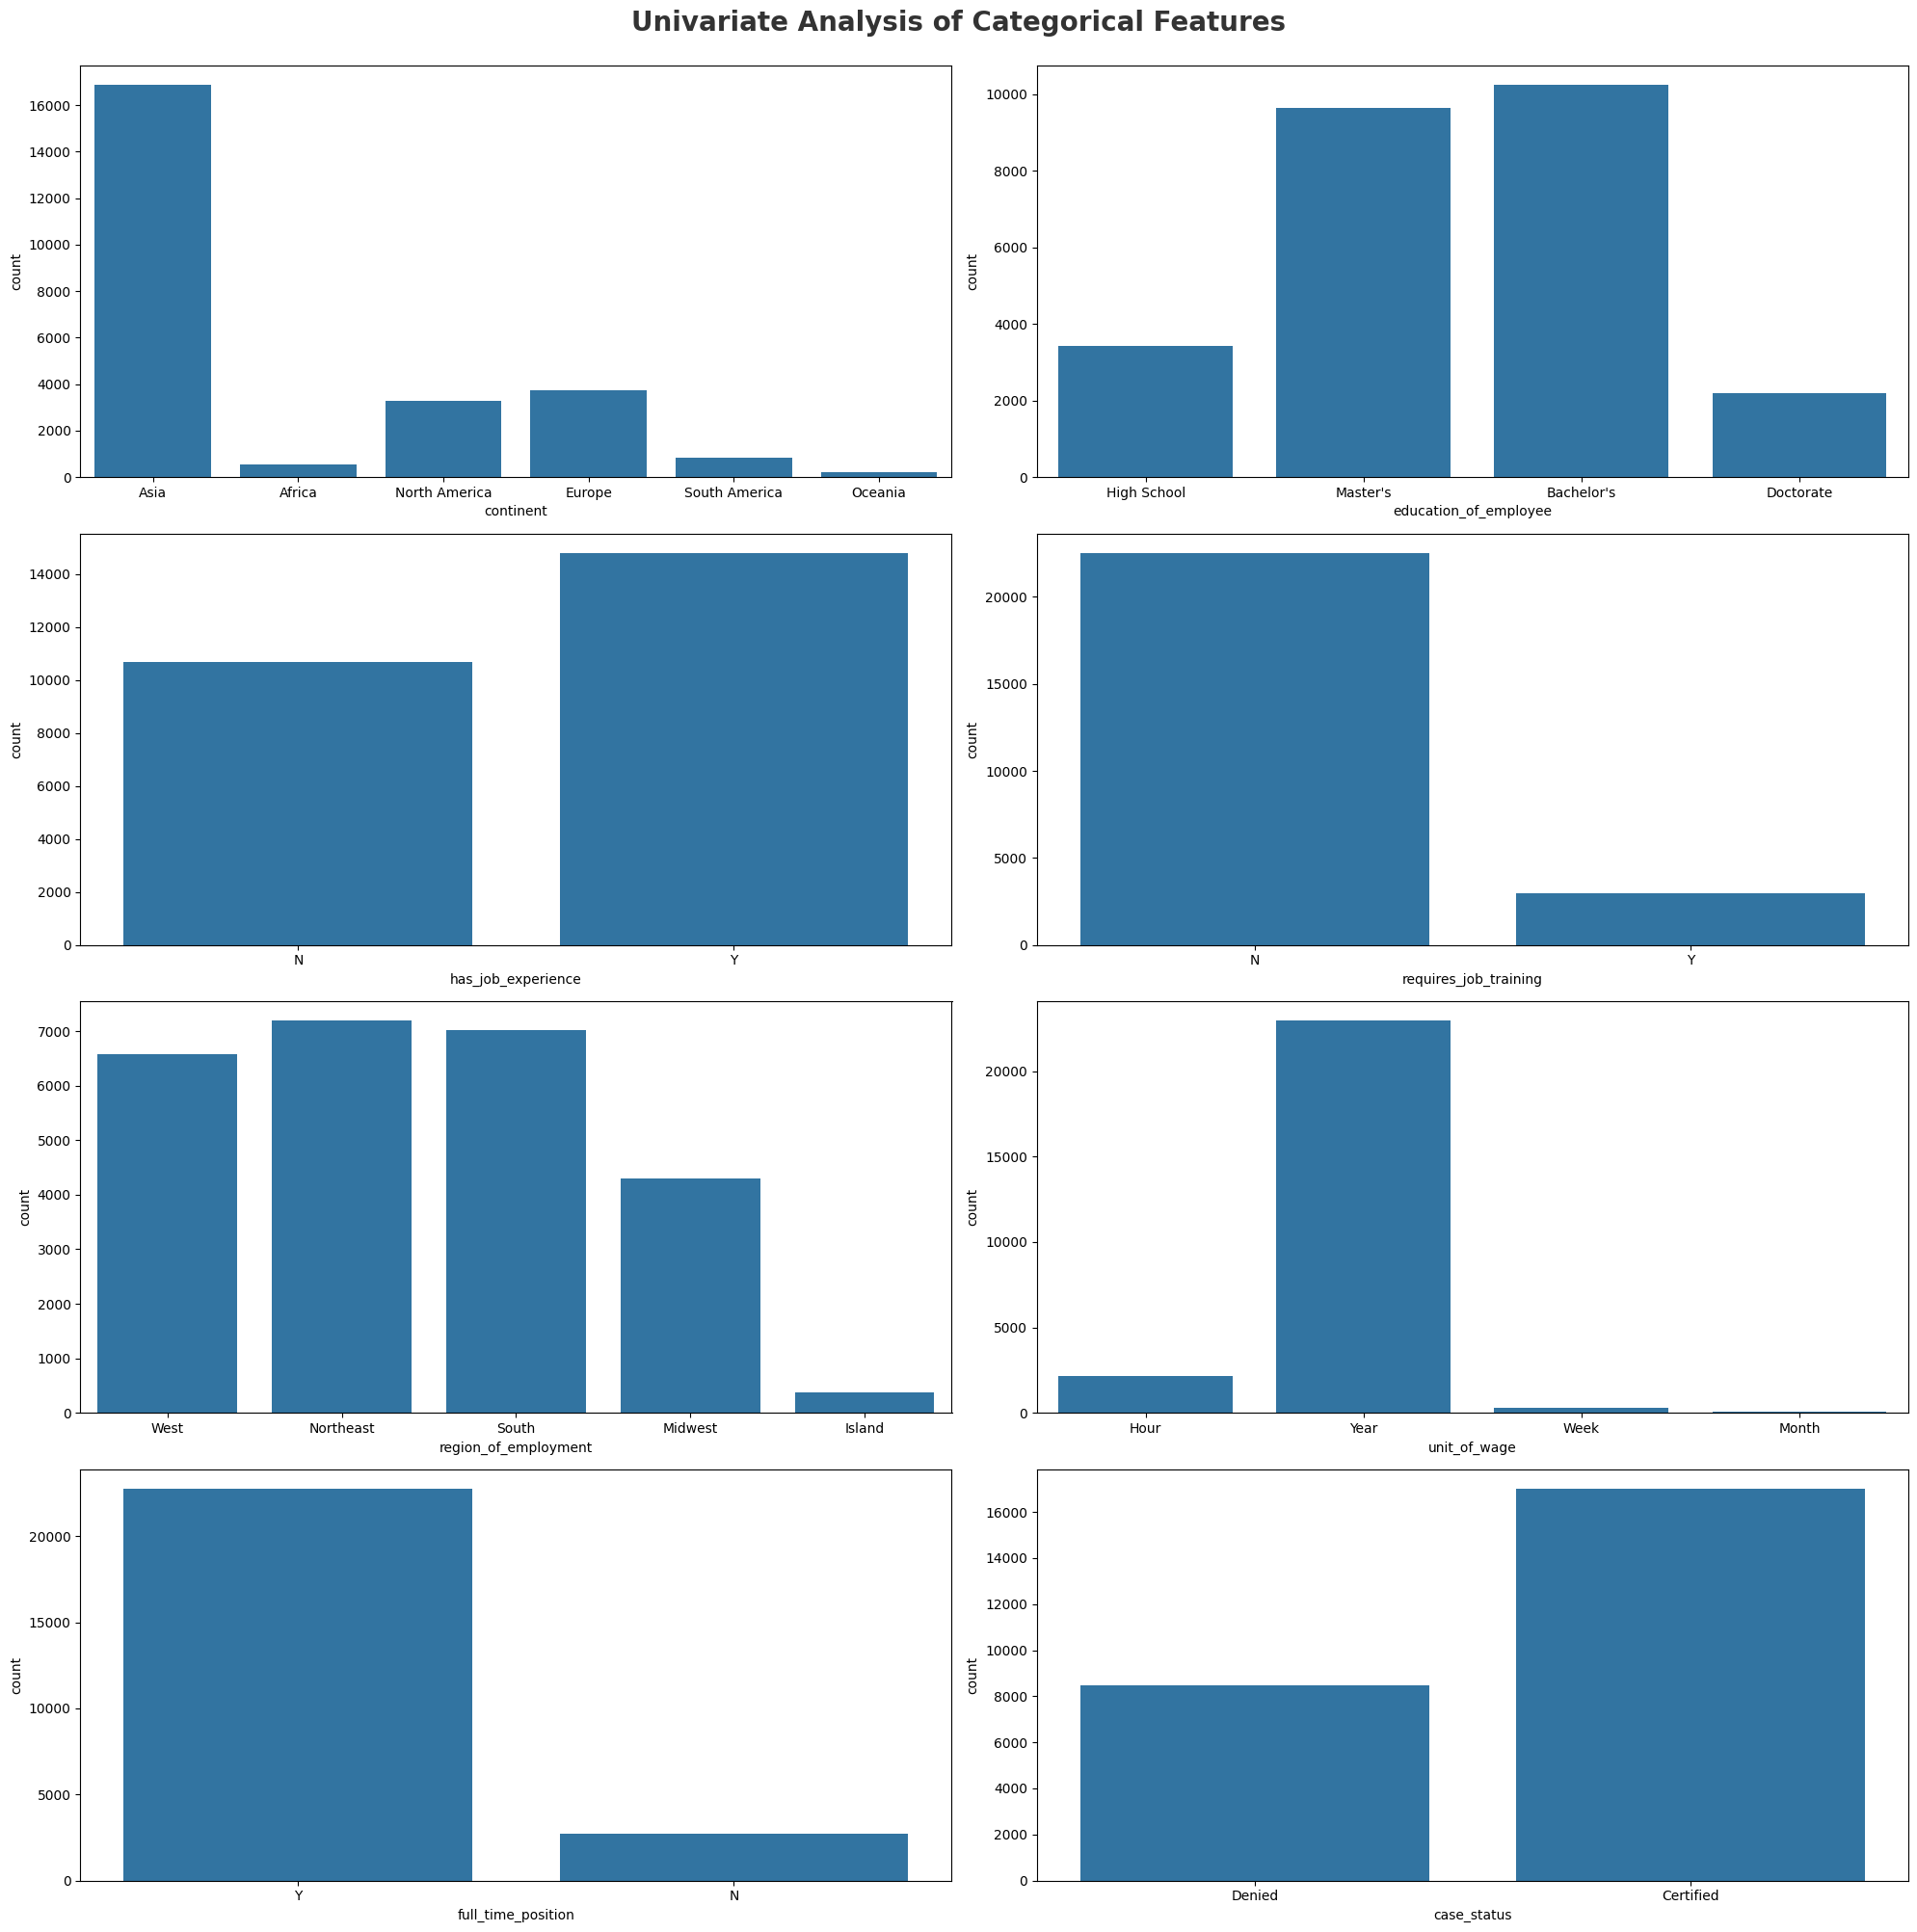

In [12]:
# Remove 'case_id' from the list of categorical features to exclude it from analysis
# categorical_features.remove('case_id')

# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Set the main title for the entire figure with specified font size, weight, transparency, and position
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through each categorical feature to create a subplot for its count distribution
for i in range(0, len(categorical_features)):
    # Create a subplot in a 3x3 grid, positioning the current plot in the correct location
    plt.subplot(4, 2, i + 1)

    # Generate a count plot for the current categorical feature
    sns.countplot(x=df[categorical_features[i]])

    # Set the x-axis label to the name of the current categorical feature
    plt.xlabel(categorical_features[i])

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()


#### **Insights**

- `requires_job_training`, `unit_of_wage`, `full_time_position` and 
`continents` coulmns have signle category dominating.

- In rest of the columns are balanced.

### **Multivariate Analysis**

- Multivariate analysis is the analysis of more than one variable.

In [13]:
# Create a list of discrete features by selecting numerical features
# Discrete features are defined as those with 25 or fewer unique values
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]

# Create a list of continuous features by selecting numerical features
# Continuous features are defined as those with more than 25 unique values
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

# Print the number of discrete features and their names
print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))

# Print the number of continuous features and their names
print('\nWe have {} continuous features : {}'.format(len(continuous_features), continuous_features))


We have 0 discrete features : []

We have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### **Multivariate Analysis**

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**


**Null Hypothesis** ($ H_0 $): The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis** ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [14]:
from scipy.stats import chi2_contingency  # Import the chi-squared test function from the scipy library

# Initialize an empty list to store the results of the chi-squared tests
chi2_test = []

# Loop through each feature in the list of categorical features
for feature in categorical_features:
    # Perform the chi-squared test of independence between 'case_status' and the current feature
    # Create a contingency table using pd.crosstab, and retrieve the p-value from the test result
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        # If the p-value is less than 0.05, reject the null hypothesis
        chi2_test.append('Reject Null Hypothesis')
    else:
        # If the p-value is 0.05 or greater, fail to reject the null hypothesis
        chi2_test.append('Fail to Reject Null Hypothesis')

# Create a DataFrame to store the results
# The DataFrame contains the names of the categorical features and their corresponding hypothesis test results
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']  # Set the column names of the DataFrame
result  # Return the result DataFrame


,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


#### **Report** 

* Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

#### **Checking Continuous Features**

In [15]:
# Create a list of continuous features by filtering numeric_features
# A feature is considered continuous if it has 10 or more unique values
continues_features = [feature for feature in numeric_features if len(df[feature].unique()) >= 10]

# Print the number of continuous features identified
print('Num of continues features :', continues_features)  # Output the list of continuous features


Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### **Distribution of Numeriical Features**

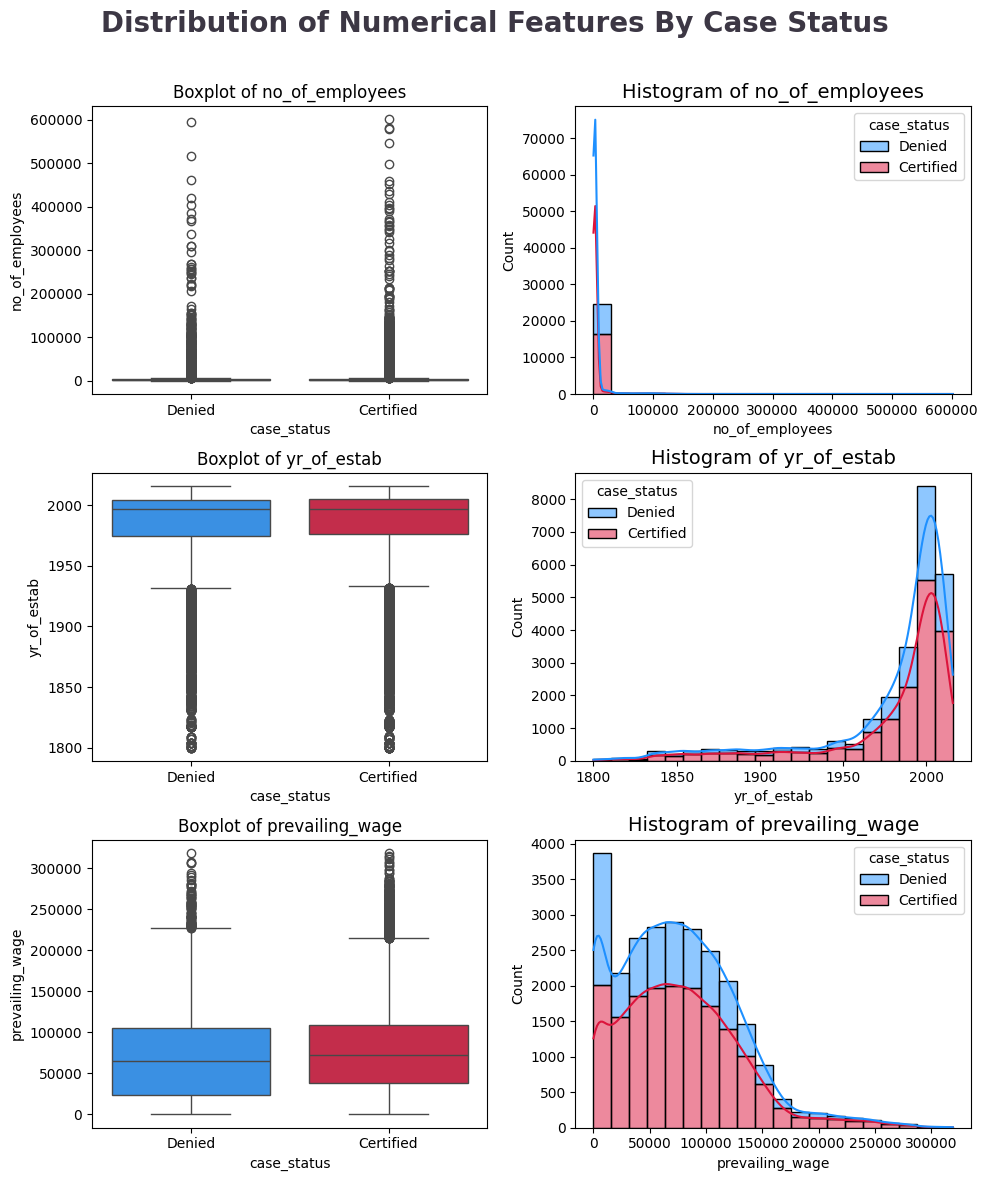

In [16]:
# Define a color palette for the plots
clr1 = ['#1E90FF', '#DC143C']

# Create a figure with a 3x2 grid of subplots, specifying the size of the figure
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

# Set the main title for the figure, customizing color, font size, weight, and alignment
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

# Loop through the list of continuous features with their corresponding index
for i, col in enumerate(continues_features):   
    # Create a boxplot for the current continuous feature grouped by 'case_status'
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)  # Set the title for the boxplot
    
    # Create a histogram for the current continuous feature, with hue based on 'case_status'
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)  # Set the title for the histogram

# Adjust the layout to prevent overlap of titles and labels
fig.tight_layout()

# Adjust the position of the main title to fit within the figure
fig.subplots_adjust(top=0.90)


#### **Insights**

* **No of Employees has many outliers which can be Handled in Feature Engineering and `no_of_employees` is Right Skewed.**
* **`yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.**
* **`prevailing_wage` is right skewed with outliers above upper bound of box plot.**
* **There are No missing values in the dataset.**
* **The `case_id` column can be deleted because each row has unique values.**
* **The `case_status` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

### **Data Visualization**

#### **Visualize the Target Variable**

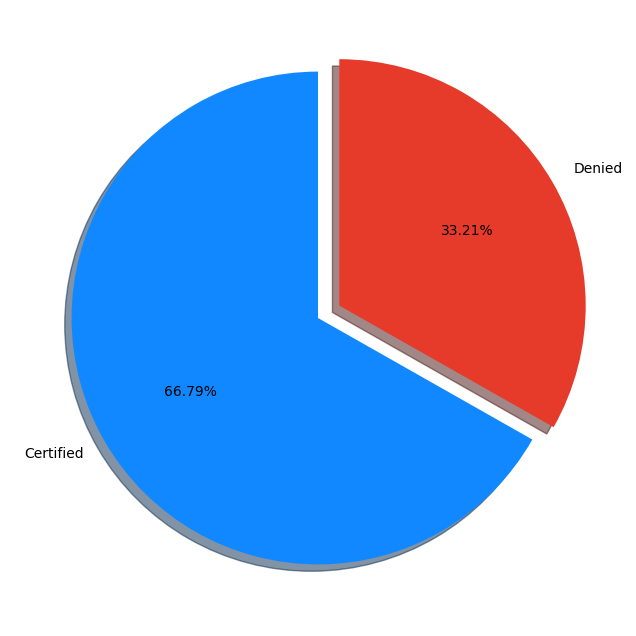

In [17]:
# Calculate the percentage distribution of each case status in the DataFrame
percentage = df.case_status.value_counts(normalize=True) * 100

# Define the labels for the pie chart
labels = ["Certified", "Denied"]

# Create a pie chart using Matplotlib
fig, ax = plt.subplots(figsize=(15, 8))  # Create a figure and axis with specified size

# Define the "explode" effect for the pie chart slices
explode = (0, 0.1)  # The second slice (Denied) will be slightly separated from the center

# Define the colors for the pie chart slices
colors = ['#1188ff', '#e63a2a']  # Blue for Certified and Red for Denied

# Create the pie chart with specified parameters
ax.pie(percentage, labels=labels, startangle=90,
       autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)

# Display the pie chart
plt.show()


#### **Insights**

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

###  **Does applicant Continent has any impact on Visa status ?**


In [18]:
# Group the DataFrame by 'continent' and calculate the normalized value counts of 'case_status'
# The result is a multi-index Series where the first index is 'continent' and the second index is 'case_status'
# The normalize=True parameter ensures the counts are expressed as proportions (between 0 and 1)

# Convert the Series to a DataFrame and multiply by 100 to express proportions as percentages
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame() * 100


proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

### **Visualizes the Distribution of Visa Statuses Across Different Continents**

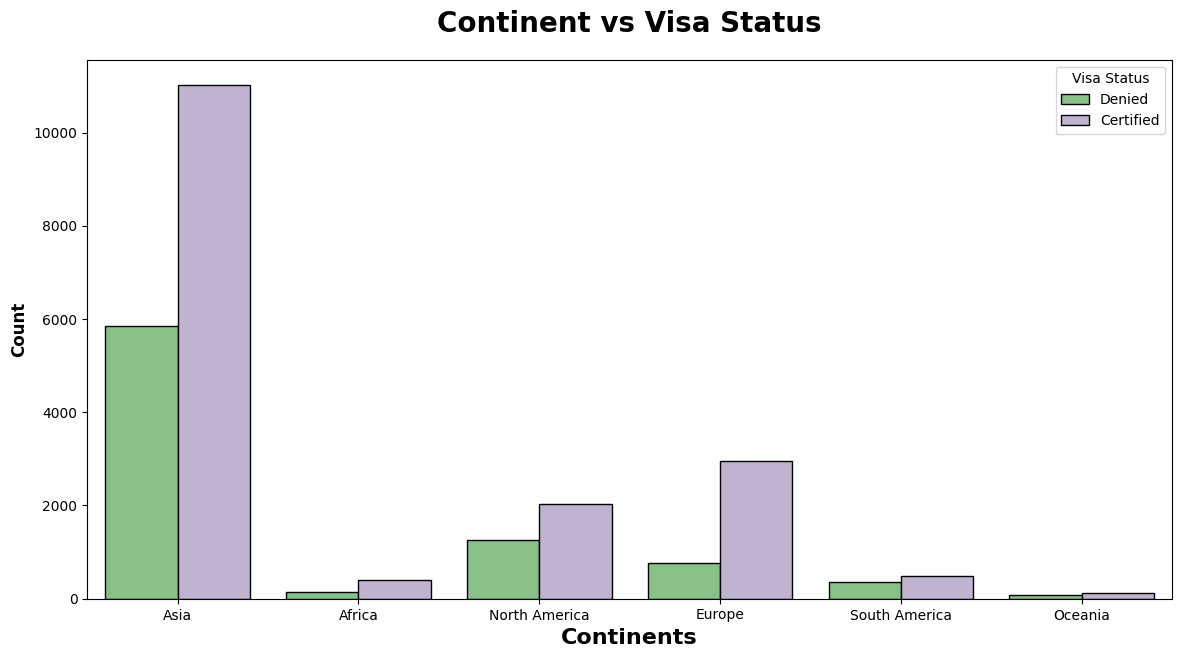

In [19]:
# Create a figure with a specified size of 14x7 inches for the count plot
plt.subplots(figsize=(14, 7))

# Create a count plot using Seaborn to visualize the number of cases for each continent, 
# grouped by the 'case_status' (hue). The edge color of the bars is set to black.
sns.countplot(x="continent", hue="case_status", data=df, ec="black", palette="Accent")

# Set the title of the plot with specified font weight, size, and padding
plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)

# Set the label for the y-axis, with specified font weight and size
plt.ylabel("Count", weight="bold", fontsize=12)

# Set the label for the x-axis, with specified font weight and size
plt.xlabel("Continents", weight="bold", fontsize=16)

# Add a legend to the plot, with a title and fancy box style
plt.legend(title="Visa Status", fancybox=True)

# Display the plot
plt.show()


In [20]:
# let's make copy of our data

df2 = df.copy()

### **visualizes the percentage of certified cases by continent**

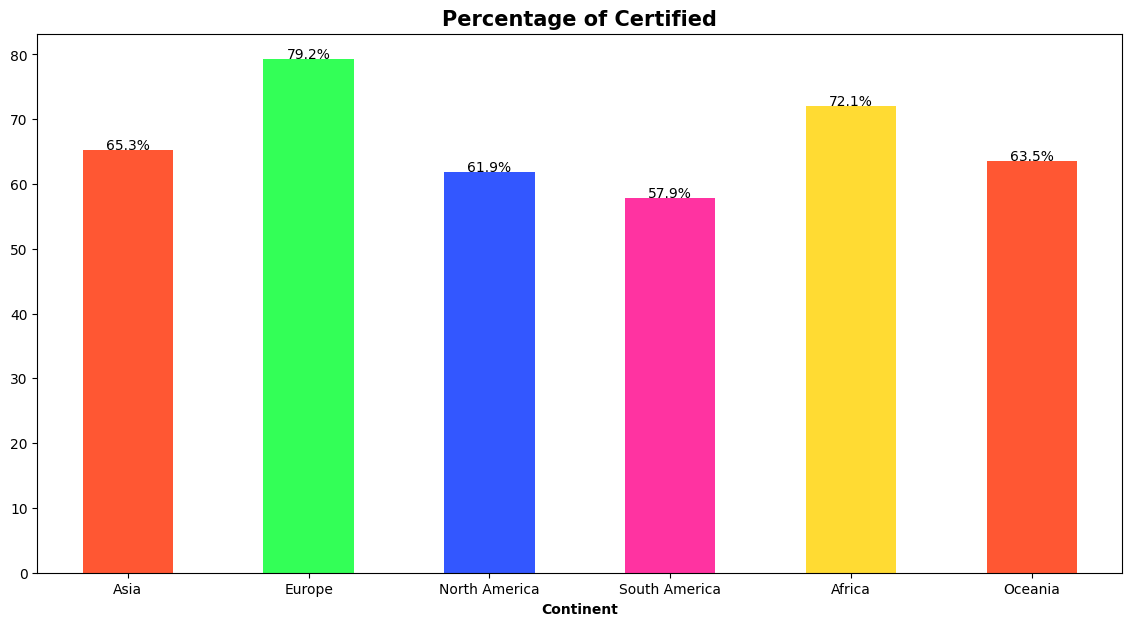

In [21]:
# Set the figure size to 14 inches wide and 7 inches tall
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'Certified' cases for each continent and plot it as a bar chart
(100 * df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts() / df2['continent'].value_counts()).plot(
    kind='bar', stacked=True, color=['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFDB33'])  # Specify unique colors for each continent

# Set the title of the plot with specified font size and weight
plt.title("Percentage of Certified", fontsize=15, fontweight='bold')

# Calculate the order of percentages for placing text labels
order1 = (100 * df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts() / df2['continent'].value_counts())

# Loop through each continent to place the percentage labels above the bars
for n in range(order1.shape[0]):
    count = order1[n]  # Get the percentage count for the current continent
    strt = '{:0.1f}%'.format(count)  # Format the percentage as a string
    plt.text(n, count + 0.1, strt, ha='center')  # Place the text label above the bar

# Set the label for the x-axis with bold font weight
plt.xlabel('Continent', fontweight='bold')

# Rotate the x-tick labels to be horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


#### **Report:**
* As per the Chart Asia applicants applied more than other continents.
* 43% of Certified applications are from Asia.
* This is followed by Europe with 11% of Certified applications.
* Highest chance of getting certified if you are from `Europe` and followed by `Africa`

### **Does applicant education has any impact on Visa status ?**

In [22]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

### **Distribution of visa statuses based on the education levels of Employees**

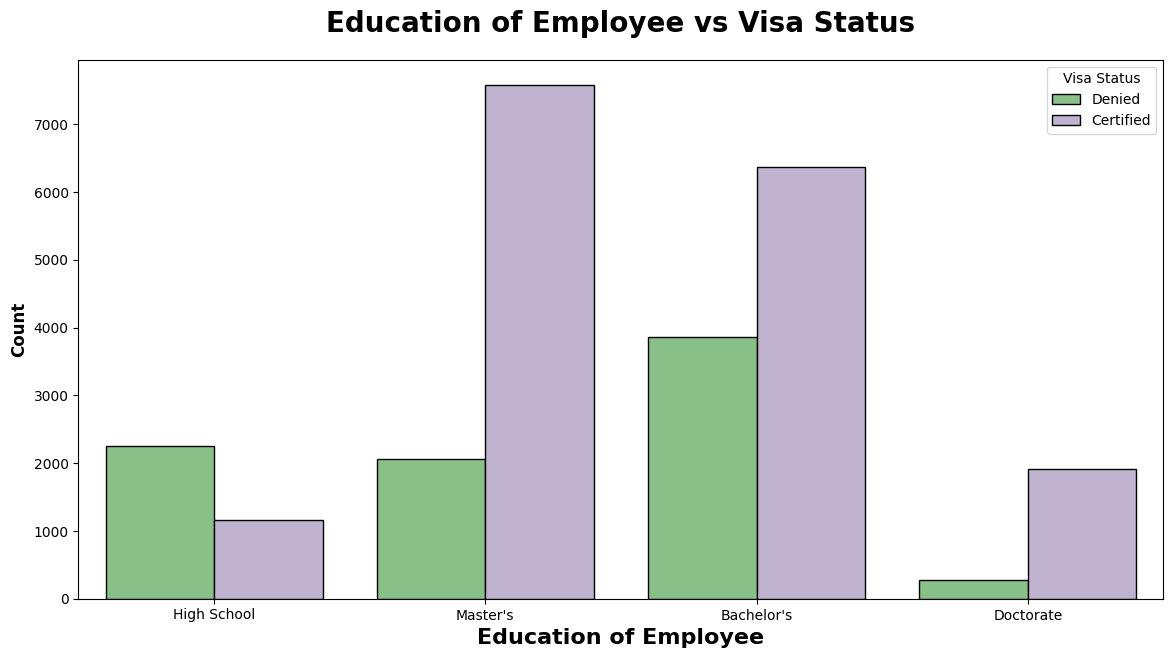

In [25]:
# Create a figure with a specified size of 14x7 inches for the count plot
plt.subplots(figsize=(14, 7))

# Create a count plot using Seaborn to visualize the number of cases for each education level of employees,
# grouped by the 'case_status' (hue). The edge color of the bars is set to black.
sns.countplot(x="education_of_employee", hue="case_status", data=df, ec="black", palette="Accent")

# Set the title of the plot with specified font weight, size, and padding
plt.title("Education of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)

# Set the label for the y-axis, with specified font weight and size
plt.ylabel("Count", weight="bold", fontsize=12)

# Set the label for the x-axis, with specified font weight and size
plt.xlabel("Education of Employee", weight="bold", fontsize=16)

# Add a legend to the plot, with a title and fancy box style
plt.legend(title="Visa Status", fancybox=True)

# Display the plot
plt.show()


### **Percentage of Certified Cases Based on the Education Levels of Employees**

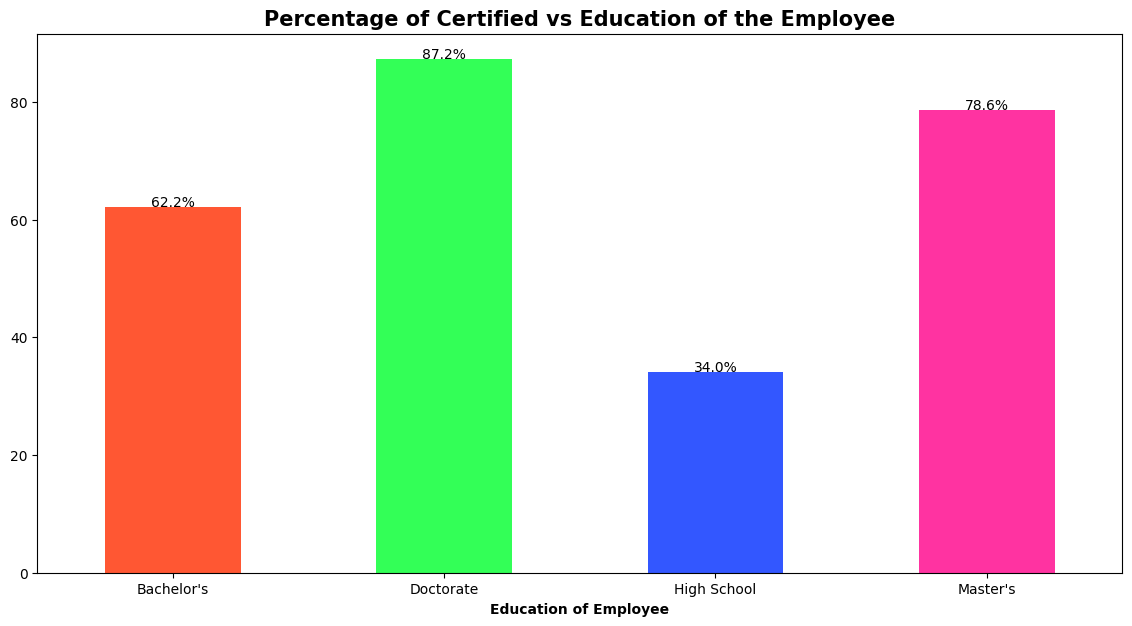

In [26]:
# Set the figure size to 14 inches wide and 7 inches tall
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'Certified' cases for each education level and plot it as a bar chart
(100 * df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts() / 
 df2['education_of_employee'].value_counts()).plot(
    kind='bar', stacked=True, color=['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFDB33'])  # Specify unique colors for different education levels

# Set the title of the plot with specified font size and weight
plt.title("Percentage of Certified vs Education of the Employee", fontsize=15, fontweight='bold')

# Calculate the order of percentages for placing text labels
order1 = (100 * df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts() / 
              df2['education_of_employee'].value_counts())

# Loop through each education level to place the percentage labels above the bars
for n in range(order1.shape[0]):
    count = order1[n]  # Get the percentage count for the current education level
    strt = '{:0.1f}%'.format(count)  # Format the percentage as a string
    plt.text(n, count + 0.1, strt, ha='center')  # Place the text label above the bar

# Set the label for the x-axis with bold font weight
plt.xlabel('Education of Employee', fontweight='bold')

# Rotate the x-tick labels to be horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


#### **Insights**
- education status has high impact
- `Doctorate` and `Master's` graduates have higher cange of being accepted then the others.

### **Does applicant's previous work experience has any impact on Visa status ?**

In [27]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

### **Visualizes the distribution of visa statuses based on the previous work experience of employees**

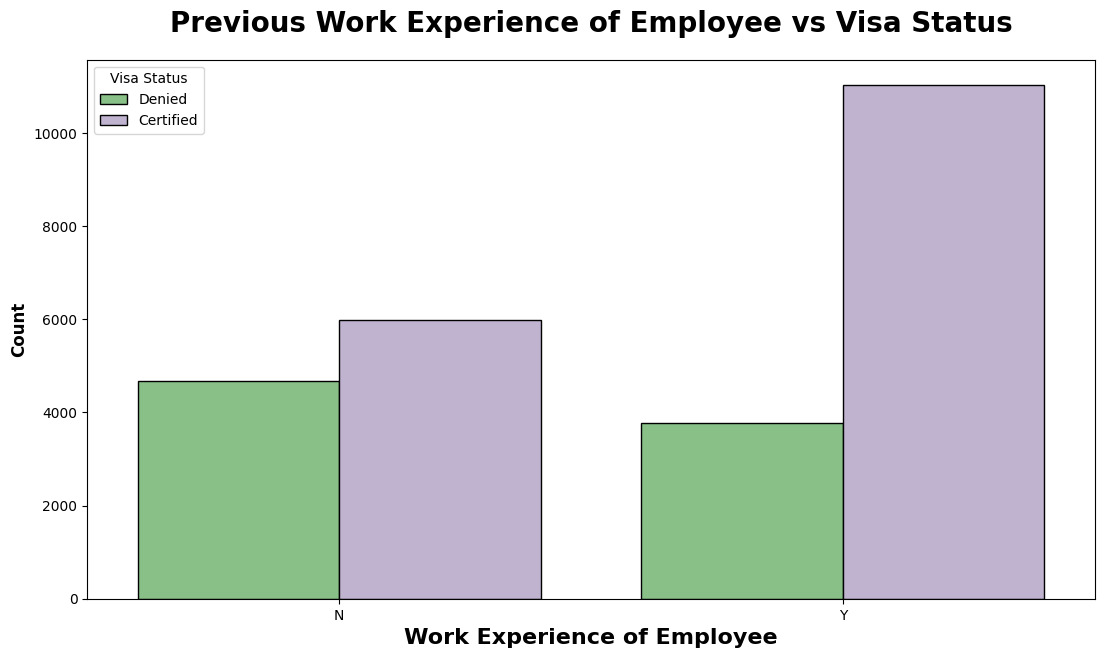

In [28]:
# Create a figure with a specified size of 13x7 inches for the count plot
plt.subplots(figsize=(13, 7))

# Create a count plot using Seaborn to visualize the number of cases for each work experience status of employees,
# grouped by the 'case_status' (hue). The edge color of the bars is set to black.
sns.countplot(x="has_job_experience", hue="case_status", data=df, ec="black", palette="Accent")

# Set the title of the plot with specified font weight, size, and padding
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)

# Set the label for the y-axis, with specified font weight and size
plt.ylabel("Count", weight="bold", fontsize=12)

# Set the label for the x-axis, with specified font weight and size
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)

# Add a legend to the plot, with a title and fancy box style
plt.legend(title="Visa Status", fancybox=True)

# Display the plot
plt.show()


### **Percentage of certified cases based on job experience (Yes or No)**

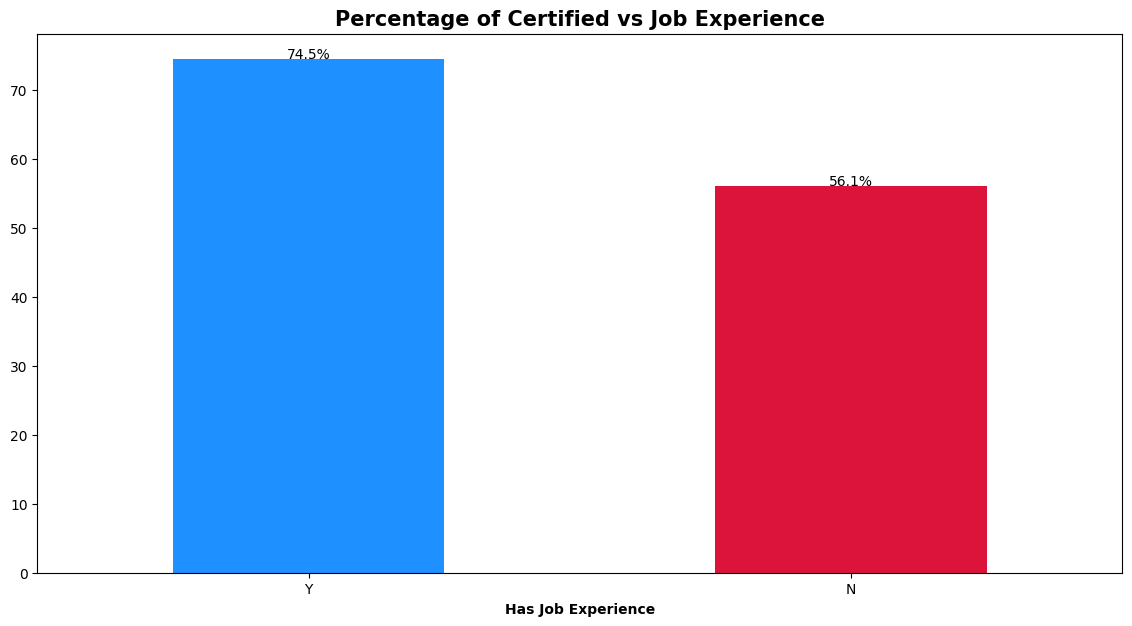

In [29]:
# Set the figure size to 14 inches wide and 7 inches tall
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'Certified' cases for each job experience status and plot it as a bar chart
# Use specific colors for "Y" and "N" (Yes and No)
(100 * df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts() / 
 df2['has_job_experience'].value_counts()).plot(
    kind='bar', stacked=True, color=['#1E90FF', '#DC143C'])  # Blue for "Y" and Red for "N"

# Set the title of the plot with specified font size and weight
plt.title("Percentage of Certified vs Job Experience", fontsize=15, fontweight='bold')

# Calculate the order of percentages for placing text labels
order1 = (100 * df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts() / 
              df2['has_job_experience'].value_counts())

# Loop through each job experience status to place the percentage labels above the bars
for n in range(order1.shape[0]):
    count = order1[n]  # Get the percentage count for the current job experience status
    strt = '{:0.1f}%'.format(count)  # Format the percentage as a string
    plt.text(n, count + 0.1, strt, ha='center')  # Place the text label above the bar

# Set the label for the x-axis with bold font weight
plt.xlabel('Has Job Experience', fontweight='bold')

# Rotate the x-tick labels to be horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


#### **Report**

* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means work experience has effect on Visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

### **If the Employee requires job training, does it make any impact on visa status?**

In [30]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

### **Visualize the distribution of visa statuses based on whether the employees require job training**

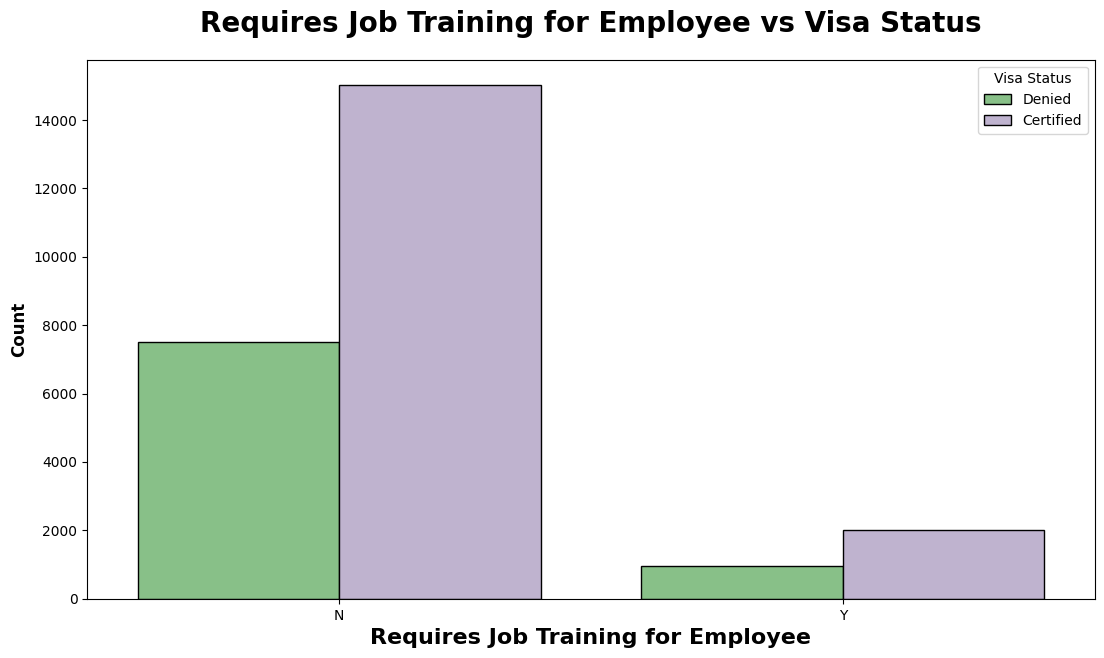

In [31]:
# Create a figure with a specified size of 13 inches wide and 7 inches tall for the count plot
plt.subplots(figsize=(13, 7))

# Create a count plot using Seaborn to visualize the number of cases for each job training requirement status of employees,
# grouped by the 'case_status' (hue). The edge color of the bars is set to black.
sns.countplot(x="requires_job_training", hue="case_status", data=df, ec="black", palette="Accent")

# Set the title of the plot with specified font weight, size, and padding
plt.title("Requires Job Training for Employee vs Visa Status", weight="bold", fontsize=20, pad=20)

# Set the label for the y-axis, with specified font weight and size
plt.ylabel("Count", weight="bold", fontsize=12)

# Set the label for the x-axis, with specified font weight and size
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)

# Add a legend to the plot, with a title and fancy box style
plt.legend(title="Visa Status", fancybox=True)

# Display the plot
plt.show()


### **Visualize the percentage of certified cases based on the requirement for job training (Yes or No)**

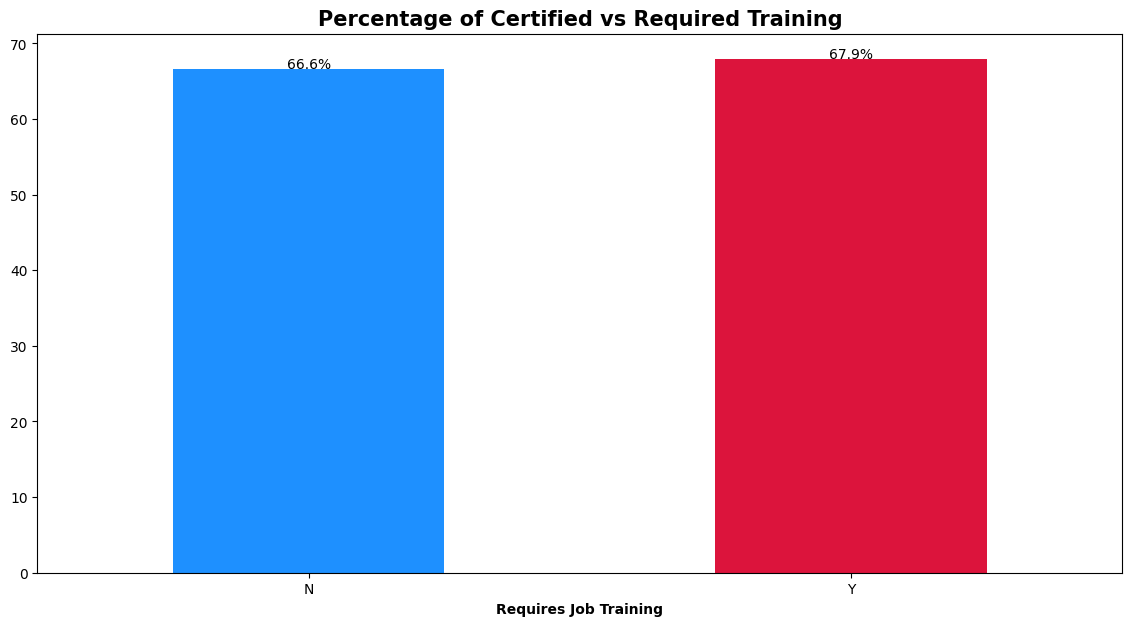

In [32]:
# Set the figure size to 14 inches wide and 7 inches tall
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'Certified' cases for each training requirement status and plot it as a bar chart
# Use specific colors for "Y" (Yes) and "N" (No) - blue for "Y" and red for "N"
(100 * df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts() / 
 df2['requires_job_training'].value_counts()).plot(
    kind='bar', stacked=True, color=['#1E90FF', '#DC143C'])  # Blue for "Y" and Red for "N"

# Set the title of the plot with specified font size and weight
plt.title("Percentage of Certified vs Required Training", fontsize=15, fontweight='bold')

# Calculate the order of percentages for placing text labels
order1 = (100 * df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts() / 
              df2['requires_job_training'].value_counts())

# Loop through each training requirement status to place the percentage labels above the bars
for n in range(order1.shape[0]):
    count = order1[n]  # Get the percentage count for the current training requirement status
    strt = '{:0.1f}%'.format(count)  # Format the percentage as a string
    plt.text(n, count + 0.1, strt, ha='center')  # Place the text label above the bar

# Set the label for the x-axis with bold font weight
plt.xlabel('Requires Job Training', fontweight='bold')

# Rotate the x-tick labels to be horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


#### **Report**

* If employee requires job training and it doesn't have any effect on Visa status.
* 88% of applicant don't require job training. 
* 63% of people who doesnt want job training got certified.
* For employees who require job training 67% of people get certified.
* As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

### **Does Number of employees of employer has any impact on Visa status?**

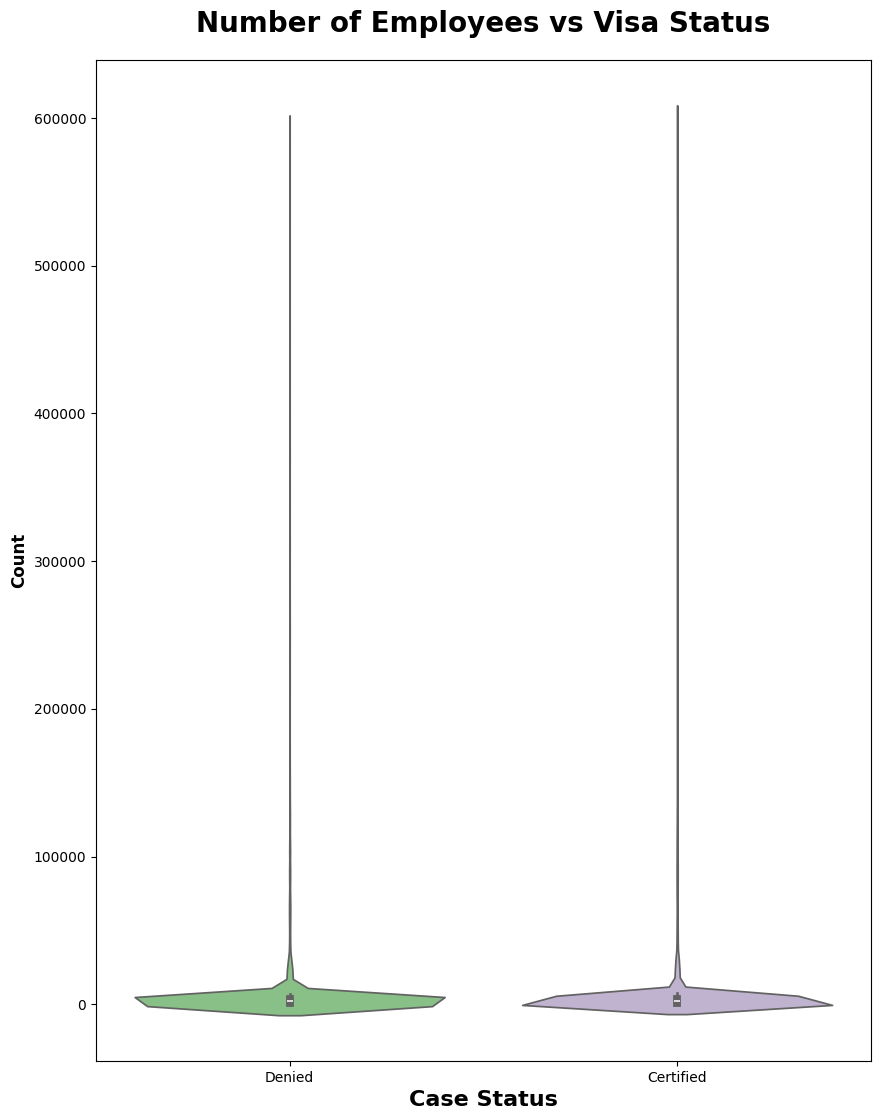

In [33]:
# Create a figure with a specified size of 10 inches wide and 13 inches tall for the violin plot
plt.subplots(figsize=(10, 13))

# Create a violin plot using Seaborn to visualize the distribution of the number of employees
# for each visa status (case_status) in the dataset. The color palette is set to "Accent".
sns.violinplot(x="case_status", y='no_of_employees', data=df, palette="Accent")

# Set the title of the plot with specified font weight, size, and padding
plt.title("Number of Employees vs Visa Status", weight="bold", fontsize=20, pad=20)

# Set the label for the y-axis, with specified font weight and size
plt.ylabel("Count", weight="bold", fontsize=12)

# Set the label for the x-axis, with specified font weight and size
plt.xlabel("Case Status", weight="bold", fontsize=16)

# Set the limits of the y-axis (this is currently empty; it can be customized if needed)
plt.ylim()

# Display the plot
plt.show()


**Insights**

 - The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

###  **Wages and its impact on Visa status**

In [34]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

### **visualizes the distribution of employees across different units of wage and their corresponding visa statuses**

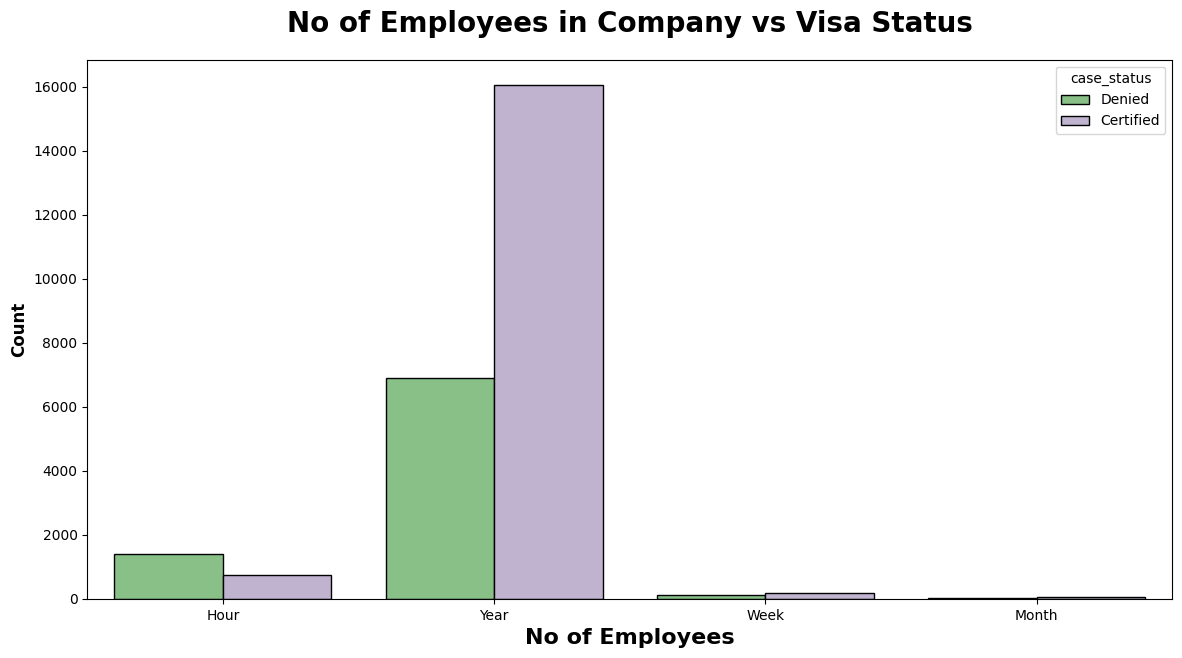

In [35]:
# Create a figure with a specified size of 14 inches wide and 7 inches tall for the count plot
plt.subplots(figsize=(14, 7))

# Create a count plot using Seaborn to visualize the number of employees categorized by their unit of wage,
# and further distinguished by visa status (case_status). The edges of the bars are set to black (ec='k'),
# and the color palette is set to "Accent".
sns.countplot(x="unit_of_wage", hue="case_status", data=df, ec='k', palette='Accent')

# Set the title of the plot with specified font weight, size, and padding
plt.title("No of Employees in Company vs Visa Status", weight="bold", fontsize=20, pad=20)

# Set the label for the x-axis, with specified font weight and size
plt.xlabel("No of Employees", weight="bold", fontsize=16)

# Set the label for the y-axis, with specified font weight and size
plt.ylabel("Count", weight="bold", fontsize=12)

# Display the plot
plt.show()


### **visually represents the percentage of certified cases by contract time unit (such as hourly, weekly, etc.)**

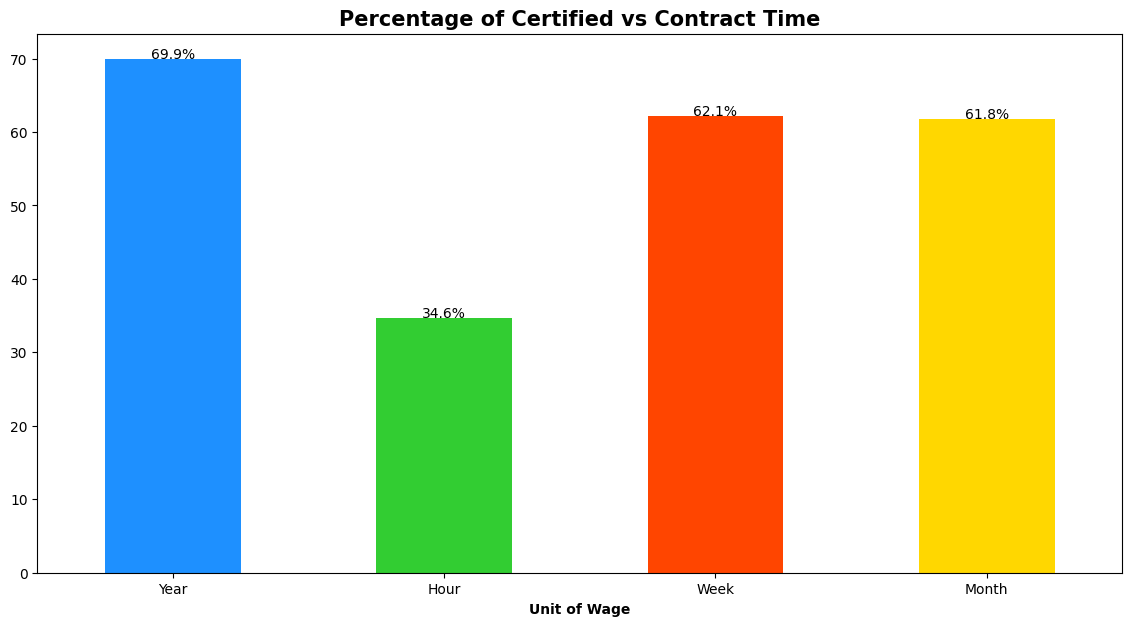

In [36]:
# Set the figure size to 14 inches wide and 7 inches tall for the bar plot
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'Certified' cases for each unit of wage and plot it as a bar chart
# Use specific colors for different units of wage for better differentiation
(100 * df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts() / 
 df2['unit_of_wage'].value_counts()).plot(
    kind='bar', stacked=True, color=['#1E90FF', '#32CD32', '#FF4500', '#FFD700'])  # Different colors for each time unit

# Set the title of the plot with specified font size and weight
plt.title("Percentage of Certified vs Contract Time", fontsize=15, fontweight='bold')

# Calculate the order of percentages for placing text labels
order1 = (100 * df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts() / 
          df2['unit_of_wage'].value_counts())

# Loop through each contract time category to place the percentage labels above the bars
for n in range(order1.shape[0]):
    count = order1[n]  # Get the percentage count for the current unit of wage
    strt = '{:0.1f}%'.format(count)  # Format the percentage as a string
    plt.text(n, count + 0.1, strt, ha='center')  # Place the text label above the bar

# Set the label for the x-axis with bold font weight
plt.xlabel('Unit of Wage', fontweight='bold')

# Rotate the x-tick labels to be horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


**Report**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

###  **Does Region of employment has impact on Visa status ?**

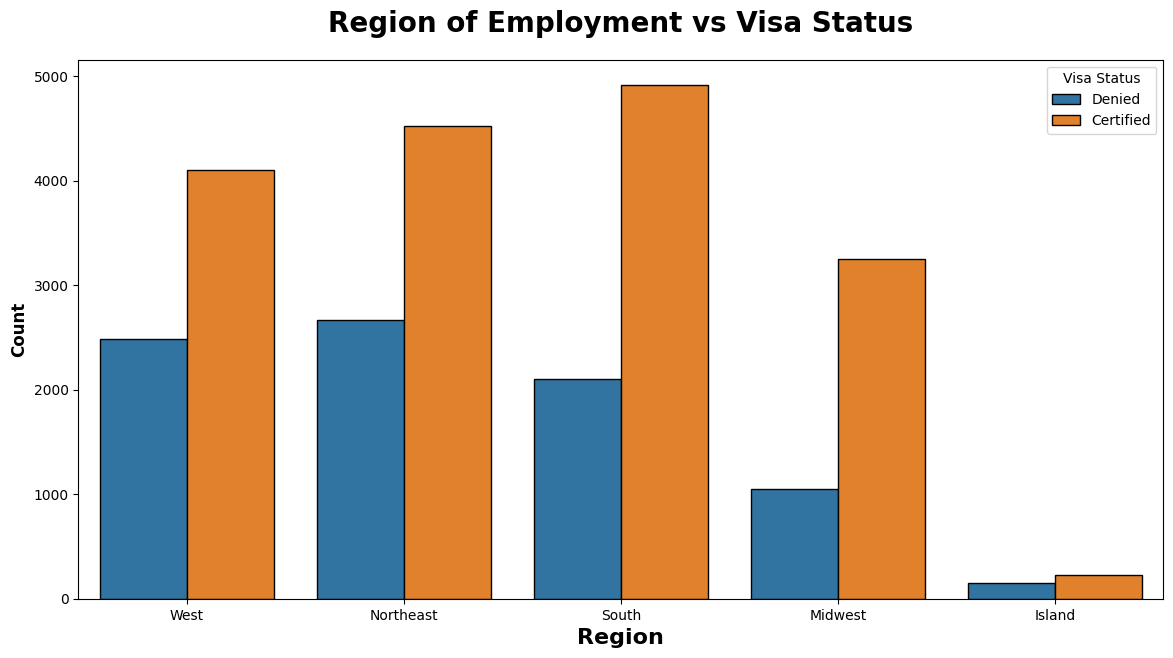

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

### **Percentage of certified cases across different regions**

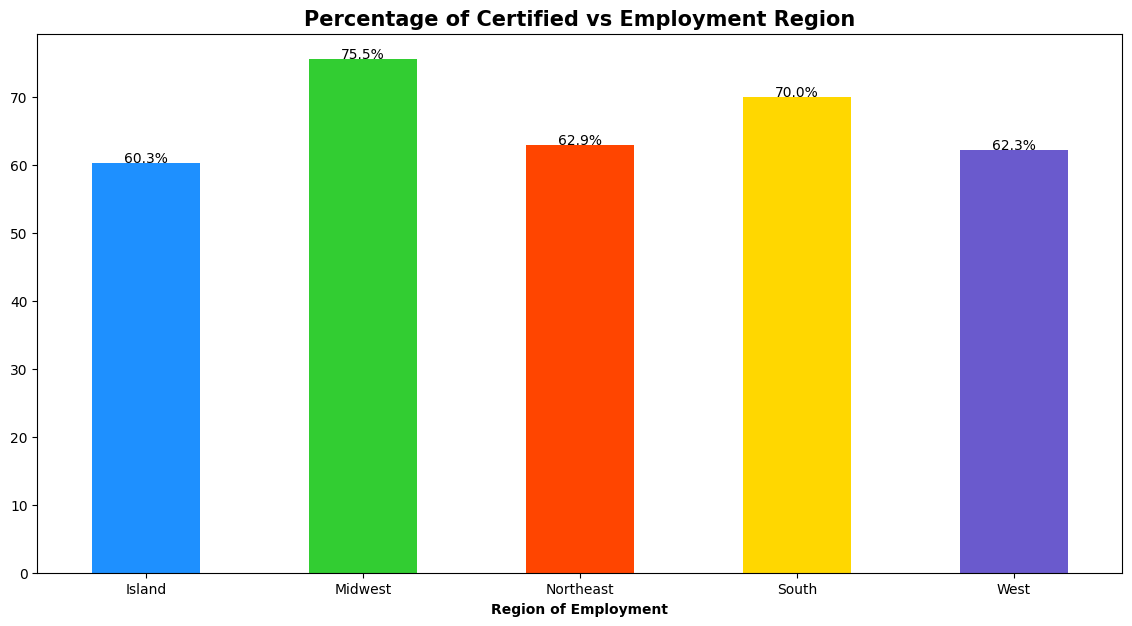

In [38]:
# Set the figure size to 14 inches wide and 7 inches tall for the bar plot
plt.figure(figsize=[14, 7])

# Calculate the percentage of 'Certified' cases for each region of employment and plot it as a bar chart
# Use specific colors for different regions of employment for better differentiation
(100 * df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts() / 
 df2['region_of_employment'].value_counts()).plot(
    kind='bar', stacked=True, color=['#1E90FF', '#32CD32', '#FF4500', '#FFD700', '#6A5ACD'])  # Different colors for each region

# Set the title of the plot with specified font size and weight
plt.title("Percentage of Certified vs Employment Region", fontsize=15, fontweight='bold')

# Calculate the percentage order for each region to place text labels
order1 = (100 * df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts() / 
          df2['region_of_employment'].value_counts())

# Loop through each region to place the percentage labels above the bars
for n in range(order1.shape[0]):
    count = order1[n]  # Get the percentage count for the current region
    strt = '{:0.1f}%'.format(count)  # Format the percentage as a string
    plt.text(n, count + 0.1, strt, ha='center')  # Place the text label above the bar

# Set the label for the x-axis with bold font weight
plt.xlabel('Region of Employment', fontweight='bold')

# Rotate the x-tick labels to be horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()


**Report** 
* As per chart all the region have very similar pattern of getting Visa certified and Denied.
* There is a slight edge for `midwest` followed by `South` region

###  **Does Prevailing wage has any impact on Visa status ?**

In [39]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

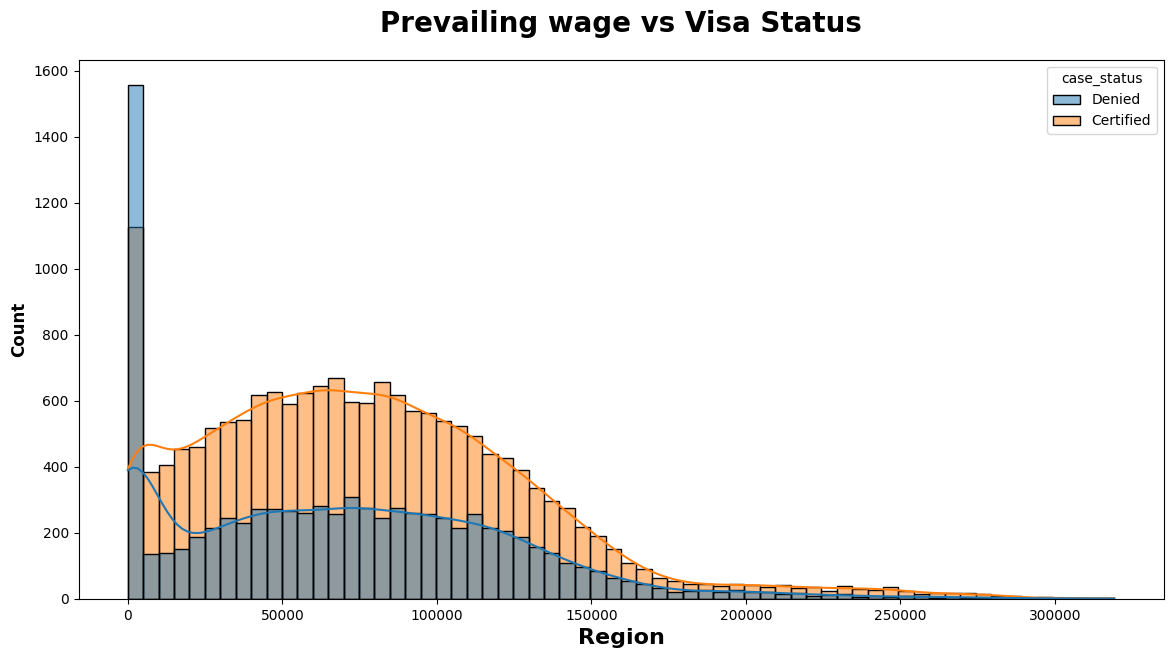

In [40]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
 - The distribution of both the classes are same but need to handel the outliers.

#### **Prevailing wage based on Education**

In [41]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


### **Education Of Employee vs Visa Status**

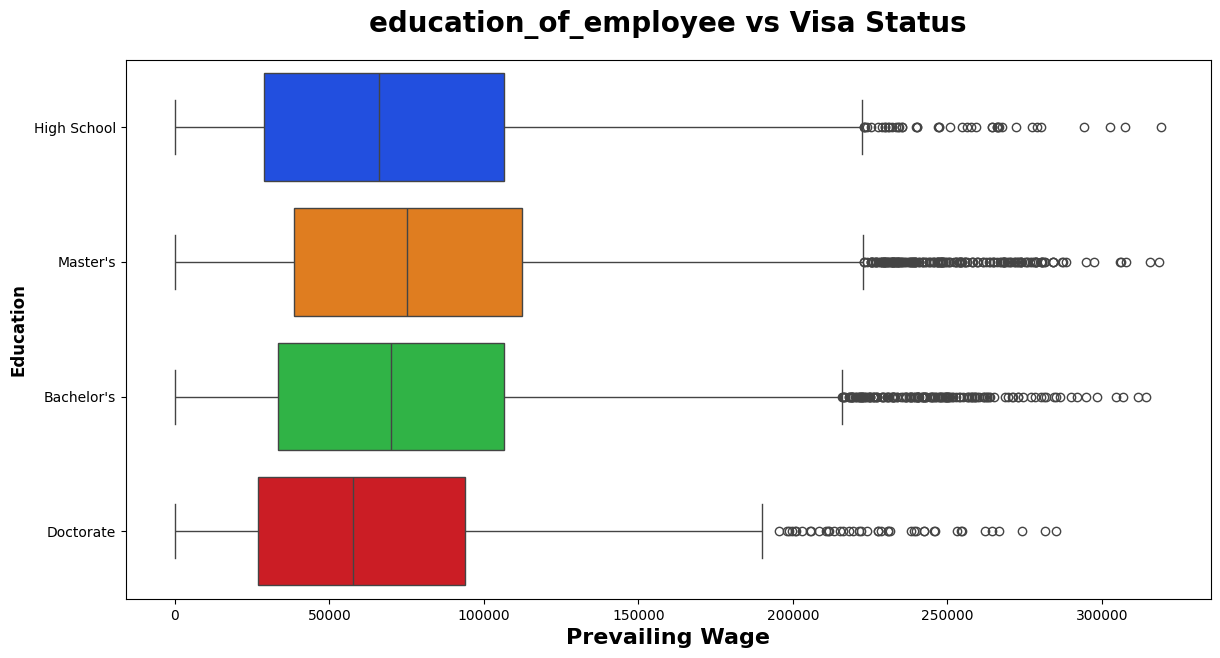

In [42]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

**Report**
* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

####  **Prevailing wage based on Job experience**

In [43]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


**Report**
* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD.

#### **Prevailing wage based on Continent**

In [44]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


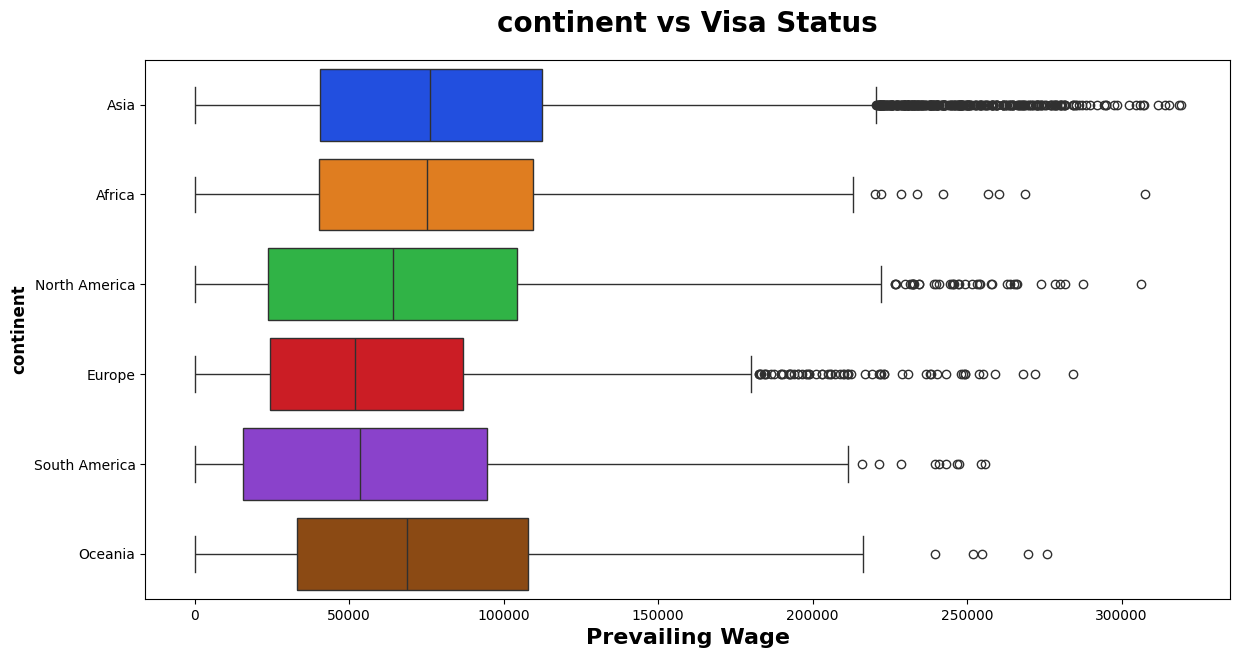

In [45]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

**Report**
* Average salary of people from Asia is higher than other continents.

### **Year of Establishment** 

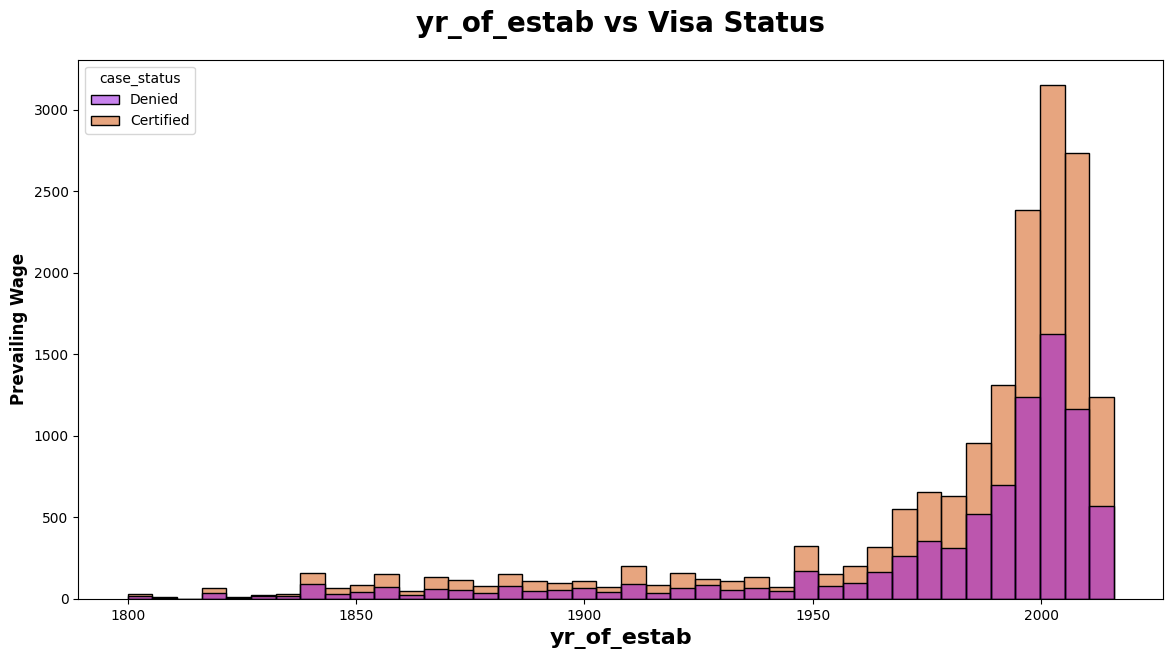

In [46]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

**Report**
* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.

### **Final Report**
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.

-------